In [ ]:
txt = "La ciencia de redes es un campo interdisciplinario que se centra en el estudio de las redes complejas encontradas en sistemas biológicos, tecnológicos y sociales. Se trata de entender cómo la estructura de una red afecta su funcionamiento y comportamiento. Por ejemplo, en las redes sociales, los patrones de conectividad entre personas pueden influir en la difusión de información y tendencias. Un aspecto clave en la ciencia de redes es el análisis de cómo las propiedades de los nodos individuales contribuyen a la dinámica global de la red. Esto incluye la identificación de nodos influentes, como pueden ser individuos clave en una red social o especies críticas en un ecosistema. Estos nodos suelen tener un alto grado de conectividad y pueden ser esenciales para mantener la integridad estructural de la red. Otro enfoque importante es el estudio de la resiliencia de las redes. Esto implica entender cómo las redes responden a perturbaciones, como puede ser la eliminación de nodos clave o la introducción de nuevos nodos. La capacidad de una red para mantener su funcionalidad ante cambios es crucial para su sostenibilidad a largo plazo. Finalmente, la visualización de redes es una herramienta fundamental en este campo. Permite a los investigadores y analistas ver patrones y estructuras que de otra manera serían difíciles de detectar. La visualización efectiva de redes es clave para comunicar descubrimientos y entender la complejidad inherente a las redes."

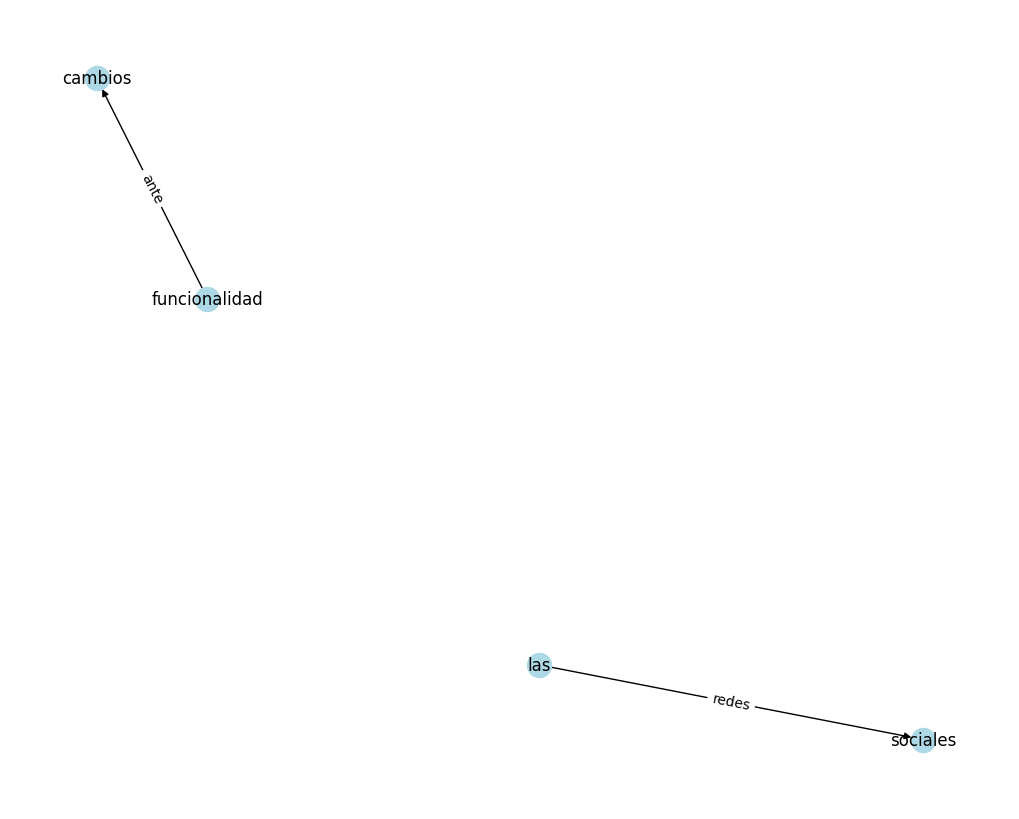

In [1]:
import spacy
from spacy.matcher import Matcher
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el modelo de Spacy
nlp = spacy.load('en_core_web_sm')

# Tu texto de ejemplo
texto = "La ciencia de redes es un campo interdisciplinario que se centra en el estudio de las redes complejas encontradas en sistemas biológicos, tecnológicos y sociales. Se trata de entender cómo la estructura de una red afecta su funcionamiento y comportamiento. Por ejemplo, en las redes sociales, los patrones de conectividad entre personas pueden influir en la difusión de información y tendencias. Un aspecto clave en la ciencia de redes es el análisis de cómo las propiedades de los nodos individuales contribuyen a la dinámica global de la red. Esto incluye la identificación de nodos influentes, como pueden ser individuos clave en una red social o especies críticas en un ecosistema. Estos nodos suelen tener un alto grado de conectividad y pueden ser esenciales para mantener la integridad estructural de la red. Otro enfoque importante es el estudio de la resiliencia de las redes. Esto implica entender cómo las redes responden a perturbaciones, como puede ser la eliminación de nodos clave o la introducción de nuevos nodos. La capacidad de una red para mantener su funcionalidad ante cambios es crucial para su sostenibilidad a largo plazo. Finalmente, la visualización de redes es una herramienta fundamental en este campo. Permite a los investigadores y analistas ver patrones y estructuras que de otra manera serían difíciles de detectar. La visualización efectiva de redes es clave para comunicar descubrimientos y entender la complejidad inherente a las redes."

# Procesar el texto
doc = nlp(texto)

# Inicializar el Matcher
matcher = Matcher(nlp.vocab)

# Definir patrón para identificar entidades y relaciones
pattern = [{'DEP':'nsubj'}, {'DEP':'ROOT'}, {'DEP':'dobj'}]
matcher.add('EntidadesRelaciones', [pattern])

# Buscar coincidencias en el texto
matches = matcher(doc)

# Crear un grafo
G = nx.DiGraph()

# Añadir nodos y aristas al grafo basados en las coincidencias
for match_id, start, end in matches:
    span = doc[start:end]
    sujeto = span[0].text
    objeto = span[2].text
    relacion = span[1].text
    G.add_node(sujeto)
    G.add_node(objeto)
    G.add_edge(sujeto, objeto, label=relacion)

# Visualizar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue')
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

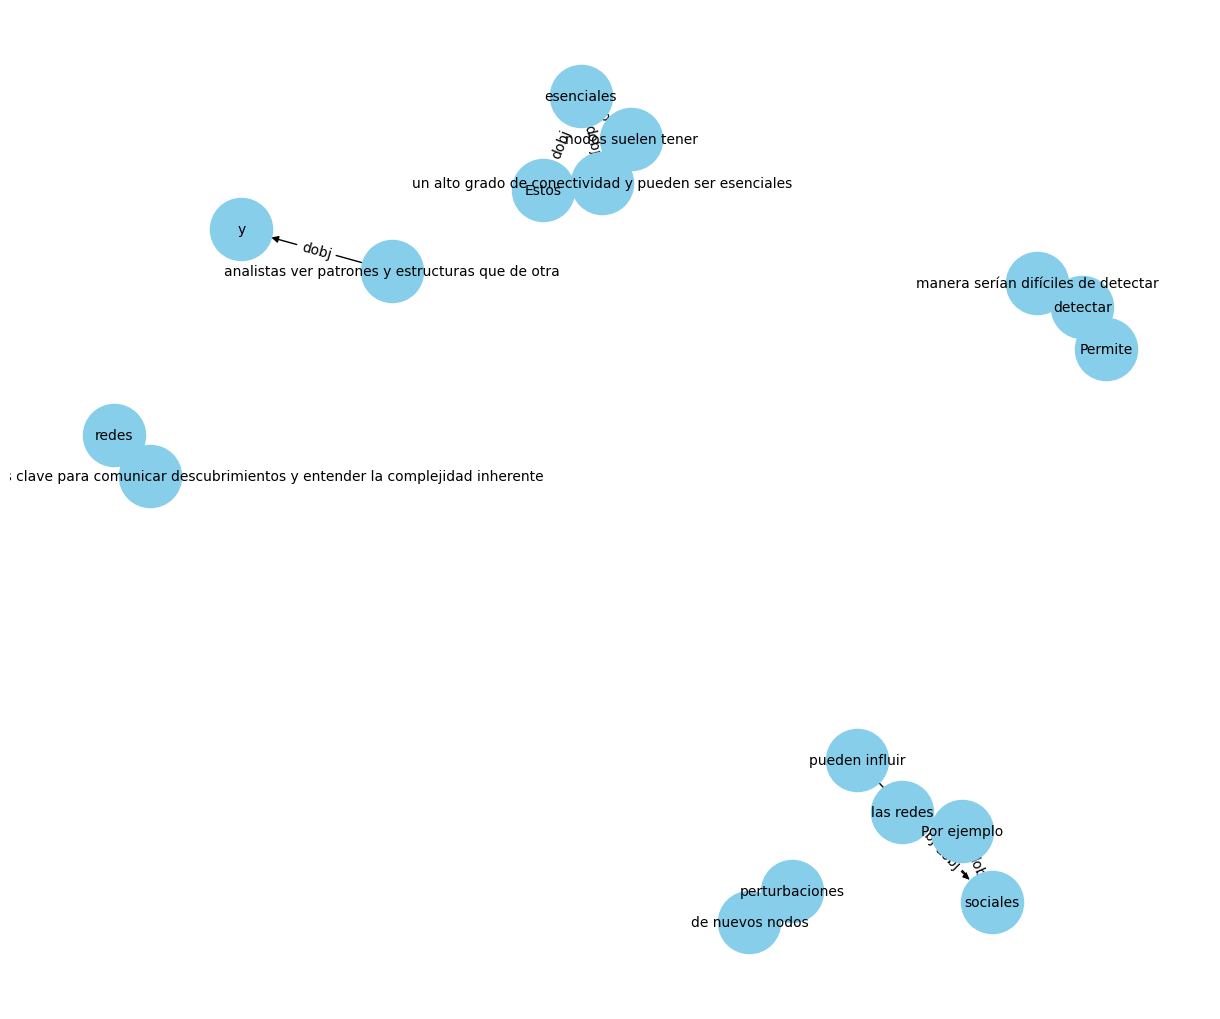

In [3]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el modelo de Spacy
nlp = spacy.load('en_core_web_lg')

# Texto de ejemplo
texto = "La ciencia de redes es un campo interdisciplinario que se centra en el estudio de las redes complejas encontradas en sistemas biológicos, tecnológicos y sociales. Se trata de entender cómo la estructura de una red afecta su funcionamiento y comportamiento. Por ejemplo, en las redes sociales, los patrones de conectividad entre personas pueden influir en la difusión de información y tendencias. Un aspecto clave en la ciencia de redes es el análisis de cómo las propiedades de los nodos individuales contribuyen a la dinámica global de la red. Esto incluye la identificación de nodos influentes, como pueden ser individuos clave en una red social o especies críticas en un ecosistema. Estos nodos suelen tener un alto grado de conectividad y pueden ser esenciales para mantener la integridad estructural de la red. Otro enfoque importante es el estudio de la resiliencia de las redes. Esto implica entender cómo las redes responden a perturbaciones, como puede ser la eliminación de nodos clave o la introducción de nuevos nodos. La capacidad de una red para mantener su funcionalidad ante cambios es crucial para su sostenibilidad a largo plazo. Finalmente, la visualización de redes es una herramienta fundamental en este campo. Permite a los investigadores y analistas ver patrones y estructuras que de otra manera serían difíciles de detectar. La visualización efectiva de redes es clave para comunicar descubrimientos y entender la complejidad inherente a las redes."

# Procesar el texto con Spacy
doc = nlp(texto)

# Crear un grafo
G = nx.DiGraph()

# Extraer entidades y relaciones
for ent in doc.ents:
    for tok in ent.root.head.children:
        if tok.dep_ in ['dobj', 'prep', 'conj']:
            G.add_edge(ent.text, tok.text, label=tok.dep_)
            for child in tok.children:
                if child.dep_ in ['pobj', 'dobj']:
                    G.add_edge(tok.text, child.text, label=child.dep_)

# Visualizar el grafo
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10)
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
